<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

## Respuesta

**Nota:** Las decisiones tomadas tuvieron en cuenta el documento `DICCIONARIO DE VARIABLES SABER 11° PERIODO 20191 a 20202.pdf` disponible en el repositorio del ICFES.

Se decidió seleccionar datos de 3 periodos de evaluación, comprendidos entre el 2019 y 2021.

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 100)
# !!!!!  Pendiente modificar esto para que cambie desde los zips
data_20191 = pd.read_csv('SB11_20191.txt', sep="¬")
data_20192 = pd.read_csv('SB11_20192.txt', sep="¬")
data_20201 = pd.read_csv('SB11_20201.txt', sep="¬")
data_20202 = pd.read_csv('SB11_20202.txt', sep="¬")
data_20211 = pd.read_csv('SB11_20211.txt', sep="¬")

d:\programas\python 3.8\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


A continuación se examina el tamaño de los conjuntos de datos para cada periodo.

In [2]:
datasets = {'20191': data_20191, '20192': data_20192, 
            '20201': data_20201, '20202': data_20202,
            '20211': data_20211}

print("Tamaño de cada conjunto de datos")
for periodo, dataset in datasets.items():
    print(periodo, ":", dataset.shape)

Tamaño de cada conjunto de datos
20191 : (21083, 82)
20192 : (546212, 82)
20201 : (15435, 81)
20202 : (504872, 81)
20211 : (15528, 78)


Se nota que existen diferencias en la forma de dataframes. La mayoría de los datos procede de los periodos 201902 y 20202, y no hay el mismo número de columnas en todos los conjuntos de datos. Para evaluar la calidad de los datos, se procede a revisar también si hay diferencias entre periodos de un mismo año.

In [3]:
# Se verificará si los nombres de columnas son los mismos entre cada año.
print("Los nombres de columnas son idénticos entre los 2 periodos de 2019 y 2020:")
for año in ('2019', '2020'):
    print(año, ":", all(datasets[año + '1'].columns.values == datasets[año + '2'].columns.values))

Los nombres de columnas son idénticos entre los 2 periodos de 2019 y 2020:
2019 : False
2020 : True


Se observa que el año 2019 tiene diferencia en nombres por lo que se encontrarán los índices y nombres de las columnas discordantes.

In [4]:
ind_col_dif = [indice for indice, identico in enumerate(datasets['20191'].columns.values == datasets['20192'].columns.values)
                       if identico == False]

print("Diferencias en columnas para el año 2019:")
for indice in ind_col_dif:
    print(datasets['20191'].columns[indice], datasets['20192'].columns[indice])

Diferencias en columnas para el año 2019:
ESTU_PAIS_RESIDE ESTU_TIENEETNIA
ESTU_TIENEETNIA ESTU_PAIS_RESIDE


Se concluye entonces que ambos dataframes del año 2019 tienen las mismas columnas, sólo que en orden diferente. Este hecho no supone problema, pero requiere tener cuidado al momento de hacer concatenaciones vertical, pues se deberán alinear las columnas.

Se procede a abordar entonces el problema de las diferencias de columnas entre años.

In [5]:
print("Diferencia de columnas (2019 respecto a 2020):\n",
      set(datasets['20191'].columns.values).difference(set(datasets['20201'].columns.values)))

print("Diferencia de columnas del (2019 respecto a 2021):\n",
      set(datasets['20191'].columns.values).difference(set(datasets['20211'].columns.values)))

print("Diferencia de columnas del (2020 respecto a 2019):\n",
      set(datasets['20201'].columns.values).difference(set(datasets['20191'].columns.values)))   

print("Diferencia de columnas del (2020 respecto a 2021):\n",
      set(datasets['20201'].columns.values).difference(set(datasets['20211'].columns.values)))

print("Diferencia de columnas del (2021 respecto a 2019):\n",
      set(datasets['20211'].columns.values).difference(set(datasets['20191'].columns.values)))

print("Diferencia de columnas del (2021 respecto a 2020):\n",
      set(datasets['20211'].columns.values).difference(set(datasets['20201'].columns.values)))

Diferencia de columnas (2019 respecto a 2020):
 {'ESTU_ETNIA'}
Diferencia de columnas del (2019 respecto a 2021):
 {'ESTU_INSE_INDIVIDUAL', 'ESTU_ETNIA', 'ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_ESTABLECIMIENTO', 'ESTU_GENERACION-E'}
Diferencia de columnas del (2020 respecto a 2019):
 set()
Diferencia de columnas del (2020 respecto a 2021):
 {'ESTU_GENERACION-E', 'ESTU_NSE_ESTABLECIMIENTO', 'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL'}
Diferencia de columnas del (2021 respecto a 2019):
 {'PERCENTIL_ESPECIAL_GLOBAL'}
Diferencia de columnas del (2021 respecto a 2020):
 {'PERCENTIL_ESPECIAL_GLOBAL'}


Estas diferencias significarían datos nulos en caso de concatenar las columnas tal cual cómo están. Para solucionar este problema se toma el siguiente curso de acción:

* Descartar `ESTU_ETNIA` (grupo étnico minoritario al que pertenece el evaluado) de los conjuntos de datos del año 2019, ante la discontinuidad de esta columna para los años 2020 y 2021.
* Descartar `ESTU_GENERACION-E` de los dataframes del 2019 y 2020, pues esta es una consecuencia del desempeño pero <u>no un factor explicativo</u> de este.

* Las variables `ESTU_INSE_INDIVIDUAL` y `ESTU_NSE_INDIVIDUAL` representan el índice y nivel (respectivamente) socioeconómico del evaluado y están presentes en los conjuntos de datos del 2019 pero no en los del 2020 y 2021. Si bien potencialmente podrían ser reconstruidos mediante una regresión logística multinomial, se sospecha que la información de ambas variables puede estar altamente correlacionada con las de las variables `FAMI_ESTRATOVIVIENDA`, `FAMI_SITUACIONECONOMICA`, `FAMI_PERSONAS_HOGAR`, `FAMI_TRABAJOLABORPADRE`  y `FAMI_TRABAJOLABORMADRE`, por lo que para avanzar el análisis más rápidamente y evitar problemas de multicolinealidad si se decide utilizar una técnica de regresión lineal, se decide por el descarte de ambas.
* Se descarta la columna `PERCENTIL_ESPECIAL_GLOBAL` pues sólo está presente en el dataframe del 2021.

In [6]:
datasets['20191'].drop("ESTU_ETNIA", axis=1, inplace=True)
datasets['20192'].drop("ESTU_ETNIA", axis=1, inplace=True)

datasets['20191'].drop("ESTU_GENERACION-E", axis=1, inplace=True)
datasets['20192'].drop("ESTU_GENERACION-E", axis=1, inplace=True)
datasets['20201'].drop("ESTU_GENERACION-E", axis=1, inplace=True)
datasets['20202'].drop("ESTU_GENERACION-E", axis=1, inplace=True)

datasets['20191'].drop(["ESTU_INSE_INDIVIDUAL", "ESTU_NSE_INDIVIDUAL"], axis=1, inplace=True)
datasets['20192'].drop(["ESTU_INSE_INDIVIDUAL", "ESTU_NSE_INDIVIDUAL"], axis=1, inplace=True)
datasets['20201'].drop(["ESTU_INSE_INDIVIDUAL", "ESTU_NSE_INDIVIDUAL"], axis=1, inplace=True)
datasets['20202'].drop(["ESTU_INSE_INDIVIDUAL", "ESTU_NSE_INDIVIDUAL"], axis=1, inplace=True)

datasets['20211'].drop("PERCENTIL_ESPECIAL_GLOBAL", axis=1, inplace=True)

Solamente queda `ESTU_NSE_ESTABLECIMIENTO` como columna discordante. Quizá pueda obtenerse mediante un cruce de los códigos de las sedes con los datos de 2019 y 2020.

In [7]:
nse_establecimientos = []

for periodo in datasets:
    try:
        temp_df = datasets[periodo][["COLE_COD_DANE_SEDE", "ESTU_NSE_ESTABLECIMIENTO"]].copy()
        temp_df = temp_df[datasets[periodo]["ESTU_NSE_ESTABLECIMIENTO"].isna() == False]
        temp_df.drop_duplicates(subset=["COLE_COD_DANE_SEDE", "ESTU_NSE_ESTABLECIMIENTO"],
                                keep='first', inplace=True, ignore_index=False)
        nse_establecimientos.append(temp_df)
    except:
        pass
    
nse_establecimientos = pd.concat(nse_establecimientos, axis=0, ignore_index=True)
nse_establecimientos.drop_duplicates(subset=["COLE_COD_DANE_SEDE", "ESTU_NSE_ESTABLECIMIENTO"],
                                     keep='first', inplace=True, ignore_index=False)

# Se crea la columna ESTU_NSE_ESTABLECIMIENTO para el dataframe del 2021
datasets["20211"] = pd.merge(datasets["20211"], nse_establecimientos, on="COLE_COD_DANE_SEDE", how="left")

# Se reemplazan los ESTU_NSE_ESTABLECIMIENTO faltantes en los demás periodos

def look(row):
    if np.isnan(row["ESTU_NSE_ESTABLECIMIENTO"]) == True:
        try:
            value = nse_establecimientos.loc[nse_establecimientos["COLE_COD_DANE_SEDE"] == row["COLE_COD_DANE_SEDE"],
                                       "ESTU_NSE_ESTABLECIMIENTO"].values[0]
            return value
        except:
            return np.NaN

for periodo in ("20191", "20192", "20201", "20202"):
    datasets[periodo].loc[datasets[periodo]["ESTU_NSE_ESTABLECIMIENTO"].isna(),
                          "ESTU_NSE_ESTABLECIMIENTO"]\
    = datasets[periodo][datasets[periodo]["ESTU_NSE_ESTABLECIMIENTO"].isna()].apply(lambda row: look(row), axis=1)

Ahora se procederá a la concatenación de los dataframes de todos los años y se examina el número de valores nulos por columna:

In [8]:
df = pd.concat(list(datasets.values()), axis=0, ignore_index=True, sort=True)

pd.set_option('display.max_rows', 100)
print(df.shape)
print("Faltantes:\n", df.isna().sum() )

(1104753, 78)
Faltantes:
 COLE_AREA_UBICACION                   0
COLE_BILINGUE                    180196
COLE_CALENDARIO                       0
COLE_CARACTER                     32469
COLE_CODIGO_ICFES                     0
COLE_COD_DANE_ESTABLECIMIENTO         0
COLE_COD_DANE_SEDE                    0
COLE_COD_DEPTO_UBICACION              0
COLE_COD_MCPIO_UBICACION              0
COLE_DEPTO_UBICACION                  0
COLE_GENERO                           0
COLE_JORNADA                          0
COLE_MCPIO_UBICACION                  0
COLE_NATURALEZA                       0
COLE_NOMBRE_ESTABLECIMIENTO           0
COLE_NOMBRE_SEDE                      0
COLE_SEDE_PRINCIPAL                   0
DESEMP_C_NATURALES                    0
DESEMP_INGLES                        59
DESEMP_LECTURA_CRITICA                0
DESEMP_MATEMATICAS                    0
DESEMP_SOCIALES_CIUDADANAS            0
ESTU_COD_DEPTO_PRESENTACION         208
ESTU_COD_MCPIO_PRESENTACION         208
ESTU_COD_RESID

Se observan que existen 180196 valores faltantes en la columna `COLE_BILINGUE`. Esto puede afectar las conclusiones en un potencial análisis que compare desempeño en la prueba de inglés respecto al carácter bilingüe del establecimiento educativo.

Una posibilidad es que existan fallos parciales en los datos, es decir, para ciertos estudiantes no se reporta la información del caracter de su bilingüe de su colegio, pero para otros del mismo establecimiento sí: en este caso sería factible cruzar la información y recuperarla.

Para el caso de fallos completos de los datos, es decir, ningún estudiante de un colegio dado tiene información del caracter de su colegio, la única forma de cubrir estos vacíos sería una investigación exhaustiva de estos establecimientos en otras fuentes, lo cual sería dispendioso: Se decide eliminar los registros con estas características.

In [9]:
groups = df.COLE_BILINGUE.isna().groupby(df.COLE_COD_DANE_SEDE, sort = False).mean()

# Descarte de fallos completos
df = df.query("~(COLE_COD_DANE_SEDE.isin(@groups[@groups == 1].index.values))")

# Tratamiento de datos parciales
sedes_bilinguismo = df[~(df["COLE_BILINGUE"].isna())][["COLE_COD_DANE_SEDE", "COLE_BILINGUE"]]
sedes_bilinguismo.drop_duplicates(subset="COLE_COD_DANE_SEDE",
                                  keep='first', inplace=True, ignore_index=True)

df = pd.merge(df, sedes_bilinguismo, on="COLE_COD_DANE_SEDE", how="left")
df = df.drop("COLE_BILINGUE_x", axis=1, inplace=False).rename(columns = {"COLE_BILINGUE_y": "COLE_BILINGUE"})

También se descartarán los nulos en `DESEMP_INGLES`, `PUNT_INGLES`, `PERCENTIL_INGLES`, `PERCENTIL_GLOBAL` y `ESTU_NSE_ESTABLECIMIENTO` puesto que ya no representan una porción significativa de la muestra.

Se aprecia además que los faltantes de `ESTU_COD_RESIDE_DEPTO` y `ESTU_COD_RESIDE_MCPIO` tienen el mismo número que `ESTU_DEPTO_RESIDE` y `ESTU_MCPIO_RESIDE`, por lo que dicha información no es recuperable y será eliminada.

In [10]:
df = df[~(df[["DESEMP_INGLES", "PUNT_INGLES", "PERCENTIL_INGLES",
              "PERCENTIL_GLOBAL", "ESTU_NSE_ESTABLECIMIENTO", "ESTU_COD_RESIDE_DEPTO",
              "ESTU_COD_RESIDE_MCPIO"]].isna().any(axis="columns"))]

No se consideran de interés las variables `ESTU_COD_DEPTO_PRESENTACION`, `ESTU_COD_MCPIO_PRESENTACION`, `ESTU_DEPTO_PRESENTACION`, `ESTU_DEPTO_RESIDE`, `ESTU_MCPIO_PRESENTACION`, `ESTU_MCPIO_RESIDE`, `COLE_CODIGO_ICFES`, `COLE_COD_DEPTO_UBICACION`, `COLE_COD_MCPIO_UBICACION` puesto que son claves externas de información que también se encuentra explícita en la tabla en forma de texto, siendo así redundantes.

In [11]:
df = df.drop(columns=["ESTU_COD_DEPTO_PRESENTACION", "ESTU_COD_MCPIO_PRESENTACION", "ESTU_DEPTO_PRESENTACION",
                      "ESTU_DEPTO_RESIDE", "ESTU_MCPIO_PRESENTACION", "ESTU_MCPIO_RESIDE", "COLE_CODIGO_ICFES",
                      "COLE_COD_DEPTO_UBICACION", "COLE_COD_MCPIO_UBICACION"], inplace=False)

Tampoco se consideran de interés para la problemática a las variables `ESTU_ESTADOINVESTIGACION`, `ESTU_TIPODOCUMENTO`, `ESTU_NACIONALIDAD`, `ESTU_ESTUDIANTE` y `ESTU_CONSECUTIVO`. No se tendrán en cuenta las variables con prefijo `DESEMP`, puesto que ya se cuenta con información de puntaje y percentil, y se excluirán del análisis las variables `COLE_SEDE_PRINCIPAL`, `COLE_NOMBRE_ESTABLECIMIENTO`, `COLE_NOMBRE_SEDE` y `COLE_CALENDARIO`.

In [12]:
df = df.drop(columns=["ESTU_ESTADOINVESTIGACION", "ESTU_TIPODOCUMENTO", "ESTU_NACIONALIDAD", "ESTU_CONSECUTIVO",
                      "COLE_SEDE_PRINCIPAL", "COLE_NOMBRE_ESTABLECIMIENTO", "ESTU_ESTUDIANTE", "COLE_NOMBRE_SEDE",
                      "COLE_CALENDARIO"], inplace=False)

df = df.loc[:, ~df.columns.str.startswith('DESEMP')]

Se decide enfocar el estudio solamente en hábitos, nutrición, división urbana-rural y en los indicadores y percepción de la situación económica del hogar y del establecimiento educativo.

In [13]:
df = df[["COLE_AREA_UBICACION", "COLE_NATURALEZA", "ESTU_DEDICACIONINTERNET",
         "ESTU_DEDICACIONLECTURADIARIA", "ESTU_HORASSEMANATRABAJA", "FAMI_COMECARNEPESCADOHUEVO",
         "FAMI_COMECEREALFRUTOSLEGUMBRE", "FAMI_COMELECHEDERIVADOS", "FAMI_NUMLIBROS", "FAMI_ESTRATOVIVIENDA",
         "FAMI_SITUACIONECONOMICA", "FAMI_TIENECOMPUTADOR", "FAMI_TIENECONSOLAVIDEOJUEGOS", "FAMI_TIENESERVICIOTV",
         "FAMI_TIENEINTERNET", "PERCENTIL_C_NATURALES", "PERCENTIL_GLOBAL", "PERCENTIL_INGLES", "PERCENTIL_LECTURA_CRITICA",
         "PERCENTIL_MATEMATICAS", "PERCENTIL_SOCIALES_CIUDADANAS", "PUNT_C_NATURALES", "PUNT_GLOBAL", "PUNT_INGLES",
         "PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_SOCIALES_CIUDADANAS", "COLE_BILINGUE", "ESTU_NSE_ESTABLECIMIENTO"]]

Se descartan los registros que tengan faltantes en todas las siguientes columnas: `ESTU_DEDICACIONINTERNET`, `ESTU_DEDICACIONLECTURADIARIA`, `ESTU_HORASSEMANATRABAJA`, `FAMI_COMECARNEPESCADOHUEVO`, `FAMI_COMECEREALFRUTOSLEGUMBRE`, `FAMI_COMELECHEDERIVADOS`, `FAMI_NUMLIBROS`, `FAMI_ESTRATOVIVIENDA`, `FAMI_TIENECOMPUTADOR`, `FAMI_TIENECONSOLAVIDEOJUEGOS`, `FAMI_TIENESERVICIOTV`, `FAMI_TIENEINTERNET`.

In [14]:
df = df[~(df[['ESTU_DEDICACIONINTERNET', 'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_HORASSEMANATRABAJA',
              'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE', 'FAMI_COMELECHEDERIVADOS',
              'FAMI_NUMLIBROS', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
              'FAMI_TIENESERVICIOTV', 'FAMI_TIENEINTERNET']].isna().all(axis="columns"))]

Se revisan ahora la forma y faltantes del dataframe resultante:

In [15]:
print(df.shape)
print("Faltantes:\n", df.isna().sum())

(906035, 29)
Faltantes:
 COLE_AREA_UBICACION                  0
COLE_NATURALEZA                      0
ESTU_DEDICACIONINTERNET          23932
ESTU_DEDICACIONLECTURADIARIA     22732
ESTU_HORASSEMANATRABAJA          12370
FAMI_COMECARNEPESCADOHUEVO       24193
FAMI_COMECEREALFRUTOSLEGUMBRE    29165
FAMI_COMELECHEDERIVADOS          26492
FAMI_NUMLIBROS                   33375
FAMI_ESTRATOVIVIENDA             27033
FAMI_SITUACIONECONOMICA          12739
FAMI_TIENECOMPUTADOR             14934
FAMI_TIENECONSOLAVIDEOJUEGOS     13710
FAMI_TIENESERVICIOTV             23669
FAMI_TIENEINTERNET               21368
PERCENTIL_C_NATURALES                0
PERCENTIL_GLOBAL                     0
PERCENTIL_INGLES                     0
PERCENTIL_LECTURA_CRITICA            0
PERCENTIL_MATEMATICAS                0
PERCENTIL_SOCIALES_CIUDADANAS        0
PUNT_C_NATURALES                     0
PUNT_GLOBAL                          0
PUNT_INGLES                          0
PUNT_LECTURA_CRITICA                 0


Permanecen entonces las siguientes variables:

* Explicativas: `COLE_AREA_UBICACION`, `ESTU_GENERO`, `COLE_NATURALEZA`, `ESTU_DEDICACIONINTERNET`, `ESTU_DEDICACIONLECTURADIARIA`, `ESTU_HORASSEMANATRABAJA`, `FAMI_COMECARNEPESCADOHUEVO`, `FAMI_COMECEREALFRUTOSLEGUMBRE`, `FAMI_COMELECHEDERIVADOS`, `FAMI_NUMLIBROS`, `FAMI_ESTRATOVIVIENDA`, `FAMI_TIENECOMPUTADOR`, `FAMI_TIENECONSOLAVIDEOJUEGOS`, `FAMI_TIENESERVICIOTV`, `FAMI_TIENEINTERNET`, `COLE_BILINGUE`, `ESTU_NSE_ESTABLECIMIENTO`.
* Respuesta: `PERCENTIL_C_NATURALES`, `PERCENTIL_GLOBAL`, `PERCENTIL_INGLES`, `PERCENTIL_LECTURA_CRITICA`, `PERCENTIL_MATEMATICAS`, `PERCENTIL_SOCIALES_CIUDADANAS`, `PUNT_C_NATURALES`, `PUNT_GLOBAL`, `PUNT_INGLES`, `PUNT_LECTURA_CRITICA`, `PUNT_MATEMATICAS`, `PUNT_SOCIALES_CIUDADANAS`.

Se decide conservar los registros con datos nulos, puesto que los que se preservan sí tienen información para una columna pero no para otra, dándole mayor potencia al análisis exploratorio de los datos; no obstante si al recurrir un análisis inferencial llegase a necesitar el uso de absolutamente todas las columnas explicativas, se descartaran aquellas filas que tengan al menos 1 dato nulo, puesto que no representan una fracción significativa de la muestra del dataframe.

Ahora se verifica el tipo de datos.

In [16]:
df.dtypes

COLE_AREA_UBICACION               object
COLE_NATURALEZA                   object
ESTU_DEDICACIONINTERNET           object
ESTU_DEDICACIONLECTURADIARIA      object
ESTU_HORASSEMANATRABAJA           object
FAMI_COMECARNEPESCADOHUEVO        object
FAMI_COMECEREALFRUTOSLEGUMBRE     object
FAMI_COMELECHEDERIVADOS           object
FAMI_NUMLIBROS                    object
FAMI_ESTRATOVIVIENDA              object
FAMI_SITUACIONECONOMICA           object
FAMI_TIENECOMPUTADOR              object
FAMI_TIENECONSOLAVIDEOJUEGOS      object
FAMI_TIENESERVICIOTV              object
FAMI_TIENEINTERNET                object
PERCENTIL_C_NATURALES              int64
PERCENTIL_GLOBAL                 float64
PERCENTIL_INGLES                 float64
PERCENTIL_LECTURA_CRITICA          int64
PERCENTIL_MATEMATICAS              int64
PERCENTIL_SOCIALES_CIUDADANAS      int64
PUNT_C_NATURALES                   int64
PUNT_GLOBAL                        int64
PUNT_INGLES                      float64
PUNT_LECTURA_CRI

* Las columnas con prefijo `COLE` son almacenadas correctamente como cadenas, puesto que son variables cualitativas nominales.
* Los columnas con prefijo `PUNT` y `PERCENTIL` son variables discretas en los archivos. Entonces `PUNT_INGLES`, `PERCENTIL_GLOBAL` y `PERCENTIL_INGLES` deben ser convertidos a enteros.
* Las columnas con prefijos `ESTU` y `FAMI` son variables cualitativas ordinales, pero están siendo almacenadas como cadenas, por lo que deben ser convertidas a factores que siguen una jerarquía, haciendo así posible el cálculo de correlaciones.

In [17]:
# Conversión de PUNT_INGLES, PERCENTIL_GLOBAL y PERCENTIL_INGLES a enteros
df[["PUNT_INGLES", "PERCENTIL_GLOBAL", "PERCENTIL_INGLES"]] = df[["PUNT_INGLES", "PERCENTIL_GLOBAL", "PERCENTIL_INGLES"]].astype(int)


def codificacion_var_ordinales(df_columna, lista_cats_ordenadas):
    columna_codificada = df_columna.astype('category')
    columna_codificada = columna_codificada.cat.reorder_categories(lista_cats_ordenadas, ordered=True)
    return columna_codificada.cat.codes

# Categorización ordinal de las columnas con prefijos ESTU y FAMI.
df['ESTU_CAT_DEDICACIONINTERNET'] = codificacion_var_ordinales(df['ESTU_DEDICACIONINTERNET'],
                                                               ['No Navega Internet', '30 minutos o menos',
                                                                'Entre 30 y 60 minutos', 'Entre 1 y 3 horas', 'Más de 3 horas'])

df['ESTU_CAT_DEDICACIONLECTURADIARIA'] = codificacion_var_ordinales(df['ESTU_DEDICACIONLECTURADIARIA'],
                                                                    ['No leo por entretenimiento', '30 minutos o menos',
                                                                     'Entre 30 y 60 minutos', 'Entre 1 y 2 horas',
                                                                     'Más de 2 horas'])

df['ESTU_CAT_HORASSEMANATRABAJA'] = codificacion_var_ordinales(df['ESTU_HORASSEMANATRABAJA'],
                                                               ['0', 'Menos de 10 horas', 'Entre 11 y 20 horas',
                                                                'Entre 21 y 30 horas', 'Más de 30 horas'])

df['FAMI_CAT_COMECARNEPESCADOHUEVO'] = codificacion_var_ordinales(df['FAMI_COMECARNEPESCADOHUEVO'],
                                                                  ['Nunca o rara vez comemos eso', '1 o 2 veces por semana',
                                                                   '3 a 5 veces por semana', 'Todos o casi todos los días'])

df['FAMI_CAT_COMECEREALFRUTOSLEGUMBRE'] = codificacion_var_ordinales(df['FAMI_COMECEREALFRUTOSLEGUMBRE'],
                                                                     ['Nunca o rara vez comemos eso', '1 o 2 veces por semana',
                                                                      '3 a 5 veces por semana', 'Todos o casi todos los días'])

df['FAMI_CAT_COMELECHEDERIVADOS'] = codificacion_var_ordinales(df['FAMI_COMELECHEDERIVADOS'],
                                                               ['Nunca o rara vez comemos eso', '1 o 2 veces por semana',
                                                                '3 a 5 veces por semana', 'Todos o casi todos los días'])

df['FAMI_CAT_NUMLIBROS'] = codificacion_var_ordinales(df['FAMI_NUMLIBROS'],
                                                      ['0 A 10 LIBROS', '11 A 25 LIBROS', '26 A 100 LIBROS',
                                                       'MÁS DE 100 LIBROS'])

df['FAMI_CAT_ESTRATOVIVIENDA'] = codificacion_var_ordinales(df['FAMI_ESTRATOVIVIENDA'],
                                                            ['Sin Estrato', 'Estrato 1', 'Estrato 2', 'Estrato 3',
                                                             'Estrato 4', 'Estrato 5', 'Estrato 6'])

df['FAMI_CAT_SITUACIONECONOMICA'] = codificacion_var_ordinales(df['FAMI_SITUACIONECONOMICA'], ['Peor', 'Igual', 'Mejor'])

df['FAMI_CAT_TIENECOMPUTADOR'] = codificacion_var_ordinales(df['FAMI_TIENECOMPUTADOR'], ['No', 'Si'])

df['FAMI_CAT_TIENECONSOLAVIDEOJUEGOS'] = codificacion_var_ordinales(df['FAMI_TIENECONSOLAVIDEOJUEGOS'], ['No', 'Si'])

df['FAMI_CAT_TIENESERVICIOTV'] = codificacion_var_ordinales(df['FAMI_TIENESERVICIOTV'], ['No', 'Si'])

df['FAMI_CAT_TIENEINTERNET'] = codificacion_var_ordinales(df['FAMI_TIENEINTERNET'], ['No', 'Si'])

df['ESTU_CAT_NSE_ESTABLECIMIENTO'] = codificacion_var_ordinales(df['ESTU_NSE_ESTABLECIMIENTO'], [1, 2, 3, 4])

df.head()

,COLE_AREA_UBICACION,COLE_NATURALEZA,ESTU_DEDICACIONINTERNET,ESTU_DEDICACIONLECTURADIARIA,ESTU_HORASSEMANATRABAJA,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_COMELECHEDERIVADOS,FAMI_NUMLIBROS,FAMI_ESTRATOVIVIENDA,FAMI_SITUACIONECONOMICA,FAMI_TIENECOMPUTADOR,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_TIENESERVICIOTV,FAMI_TIENEINTERNET,PERCENTIL_C_NATURALES,PERCENTIL_GLOBAL,PERCENTIL_INGLES,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,COLE_BILINGUE,ESTU_NSE_ESTABLECIMIENTO,ESTU_CAT_DEDICACIONINTERNET,ESTU_CAT_DEDICACIONLECTURADIARIA,ESTU_CAT_HORASSEMANATRABAJA,FAMI_CAT_COMECARNEPESCADOHUEVO,FAMI_CAT_COMECEREALFRUTOSLEGUMBRE,FAMI_CAT_COMELECHEDERIVADOS,FAMI_CAT_NUMLIBROS,FAMI_CAT_ESTRATOVIVIENDA,FAMI_CAT_SITUACIONECONOMICA,FAMI_CAT_TIENECOMPUTADOR,FAMI_CAT_TIENECONSOLAVIDEOJUEGOS,FAMI_CAT_TIENESERVICIOTV,FAMI_CAT_TIENEINTERNET,ESTU_CAT_NSE_ESTABLECIMIENTO
0,URBANO,OFICIAL,Entre 1 y 3 horas,Entre 1 y 2 horas,0,3 a 5 veces por semana,Todos o casi todos los días,Todos o casi todos los días,0 A 10 LIBROS,Estrato 4,Mejor,Si,No,Si,Si,33,29,39,29,31,22,47,235,54,50,49,40,N,3.0,3,3,0,2,3,3,0,4,2,1,0,1,1,2
1,URBANO,OFICIAL,Entre 1 y 3 horas,No leo por entretenimiento,0,Todos o casi todos los días,Nunca o rara vez comemos eso,3 a 5 veces por semana,11 A 25 LIBROS,Estrato 3,Mejor,No,No,Si,Si,27,21,10,35,25,10,44,217,35,53,45,34,N,3.0,3,0,0,3,0,2,1,3,2,0,0,1,1,2
2,URBANO,OFICIAL,30 minutos o menos,No leo por entretenimiento,Más de 30 horas,Nunca o rara vez comemos eso,Nunca o rara vez comemos eso,3 a 5 veces por semana,0 A 10 LIBROS,Estrato 2,Igual,No,Si,Si,Si,27,34,32,54,38,23,44,246,49,60,52,41,N,3.0,1,0,4,0,0,2,0,2,1,0,1,1,1,2
3,URBANO,OFICIAL,Más de 3 horas,No leo por entretenimiento,Entre 11 y 20 horas,1 o 2 veces por semana,Nunca o rara vez comemos eso,1 o 2 veces por semana,0 A 10 LIBROS,Estrato 2,Igual,Si,No,Si,Si,30,38,55,41,43,29,46,255,64,56,54,44,N,3.0,4,0,2,1,0,1,0,2,1,1,0,1,1,2
4,URBANO,NO OFICIAL,Entre 1 y 3 horas,Entre 1 y 2 horas,0,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,MÁS DE 100 LIBROS,Estrato 6,Igual,Si,Si,Si,Si,38,48,64,40,73,34,50,280,71,55,67,47,S,4.0,3,3,0,3,3,3,3,6,1,1,1,1,1,3


# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

En primer lugar, interesa comprobar si existe una brecha entre los colegios urbanos y rurales.

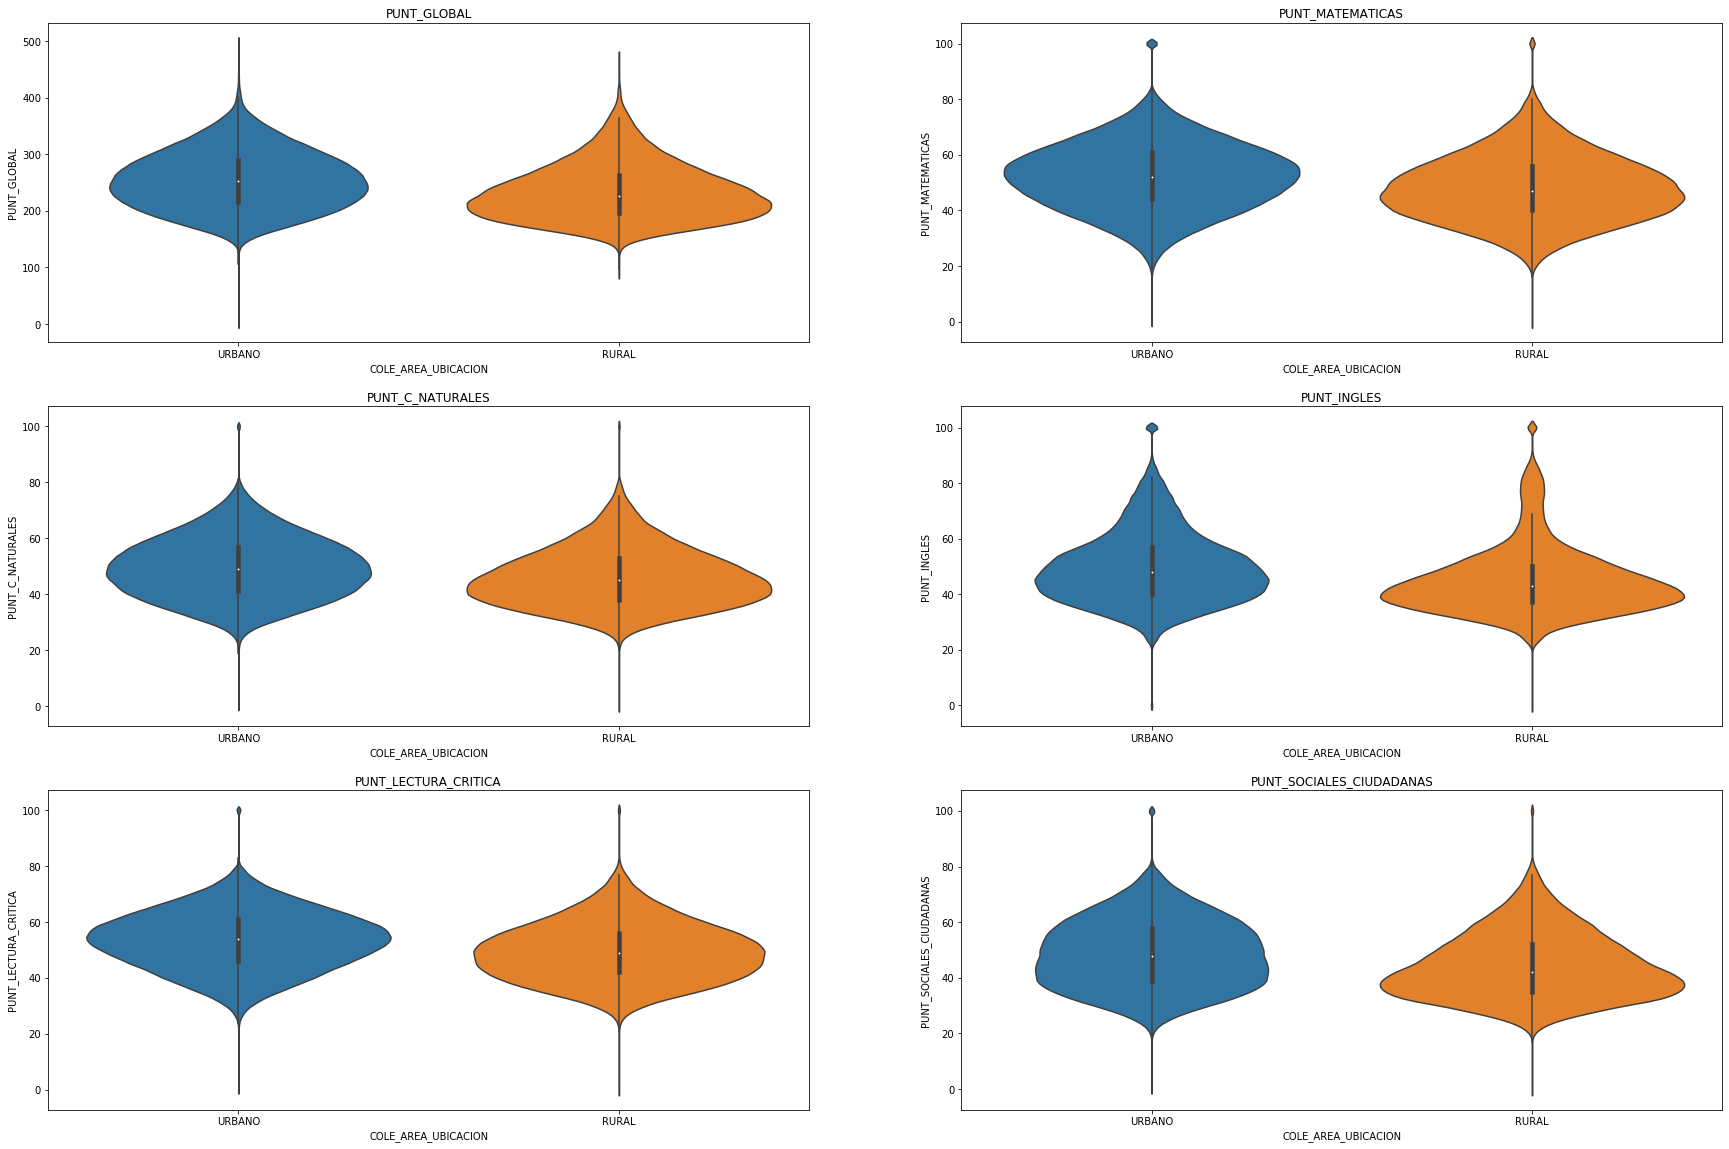

PUNT_GLOBAL                                             \
                          count        mean        std   min    25%    50%   
COLE_AREA_UBICACION                                                          
RURAL                  122514.0  233.774287  49.563399  90.0  197.0  227.0   
URBANO                 783521.0  254.136752  51.150020   0.0  216.0  252.0   

                                  PUNT_MATEMATICAS                             \
                       75%    max            count       mean        std  min   
COLE_AREA_UBICACION                                                             
RURAL                264.0  472.0         122514.0  48.023777  11.773582  0.0   
URBANO               290.0  500.0         783521.0  52.230757  11.968752  0.0   

                                             PUNT_C_NATURALES             \
                      25%   50%   75%    max            count       mean   
COLE_AREA_UBICACION                                                        
RURAL                40.0  47.0  56.0  100.0         122514.0  46.005673   
URBANO               44.0  52.0  61.0  100.0         783521.0  49.491494   

                                                             PUNT_INGLES  \
                           std  min   25%   50%   75%    max       count   
COLE_AREA_UBICACION                                                        
RURAL                10.310334  0.0  38.0  45.0  53.0  100.0    122514.0   
URBANO               10.849176  0.0  41.0  49.0  57.0  100.0    783521.0   

                                                                         \
                          mean        std  min   25%   50%   75%    max   
COLE_AREA_UBICACION                                                       
RURAL                44.959801  12.317536  0.0  37.0  43.0  50.0  100.0   
URBANO               49.535767  12.741263  0.0  40.0  48.0  57.0  100.0   

                    PUNT_LECTURA_CRITICA                                   \
                                   count       mean        std  min   25%   
COLE_AREA_UBICACION                                                         
RURAL                           122514.0  49.343536  10.405328  0.0  42.0   
URBANO                          783521.0  53.432924  10.367254  0.0  46.0   

                                       PUNT_SOCIALES_CIUDADANAS             \
                      50%   75%    max                    count       mean   
COLE_AREA_UBICACION                                                          
RURAL                49.0  56.0  100.0                 122514.0  44.246274   
URBANO               54.0  61.0  100.0                 783521.0  48.584585   

                                                              
                           std  min   25%   50%   75%    max  
COLE_AREA_UBICACION                                           
RURAL                11.737135  0.0  35.0  42.0  52.0  100.0  
URBANO               12.317785  0.0  39.0  48.0  58.0  100.0

In [19]:
fig = plt.figure(figsize=(30, 20))
gs = GridSpec(nrows = 3, ncols = 2)

ax0 = fig.add_subplot(gs[0])
ax0 = sns.violinplot(x="COLE_AREA_UBICACION", y="PUNT_GLOBAL", data=df)
plt.setp(ax0, title = 'PUNT_GLOBAL')

ax1 = fig.add_subplot(gs[1])
ax1 = sns.violinplot(x="COLE_AREA_UBICACION", y="PUNT_MATEMATICAS", data=df)
plt.setp(ax1, title = 'PUNT_MATEMATICAS')

ax2 = fig.add_subplot(gs[2])
ax2 = sns.violinplot(x="COLE_AREA_UBICACION", y="PUNT_C_NATURALES", data=df)
plt.setp(ax2, title = 'PUNT_C_NATURALES')

ax3 = fig.add_subplot(gs[3])
ax3 = sns.violinplot(x="COLE_AREA_UBICACION", y="PUNT_INGLES", data=df)
plt.setp(ax3, title = 'PUNT_INGLES')

ax4 = fig.add_subplot(gs[4])
ax4 = sns.violinplot(x="COLE_AREA_UBICACION", y="PUNT_LECTURA_CRITICA", data=df)
plt.setp(ax4, title = 'PUNT_LECTURA_CRITICA')

ax5 = fig.add_subplot(gs[5])
ax5 = sns.violinplot(x="COLE_AREA_UBICACION", y='PUNT_SOCIALES_CIUDADANAS', data=df)
plt.setp(ax5, title = 'PUNT_SOCIALES_CIUDADANAS')

plt.show()

puntajes = ["PUNT_GLOBAL", "PUNT_MATEMATICAS", "PUNT_C_NATURALES", "PUNT_INGLES", "PUNT_LECTURA_CRITICA",
            'PUNT_SOCIALES_CIUDADANAS']

df[puntajes + ["COLE_AREA_UBICACION"]].groupby("COLE_AREA_UBICACION").describe()

De los gráficos anteriores y la tabla de estadísticos descriptivos se observa que existe una diferencia entre las medias de las áreas geográficas, favoreciendo en todos los puntajes a los estudiantes de colegios ubicados en áreas urbanas.

* La mayoría de las diferencias de las medias de puntaje en las pruebas específicas tiene una magnitud de aproximadamente 3-4 puntos, pero esta se amplifica a 5 para la prueba de inglés.
* El efecto acumulado de las diferencias genera una diferencia total de aproximadamente 10.5 puntos en el puntaje general.


A continuación, se examina la diferencia entre puntajes de los colegios urbanos y públicos.

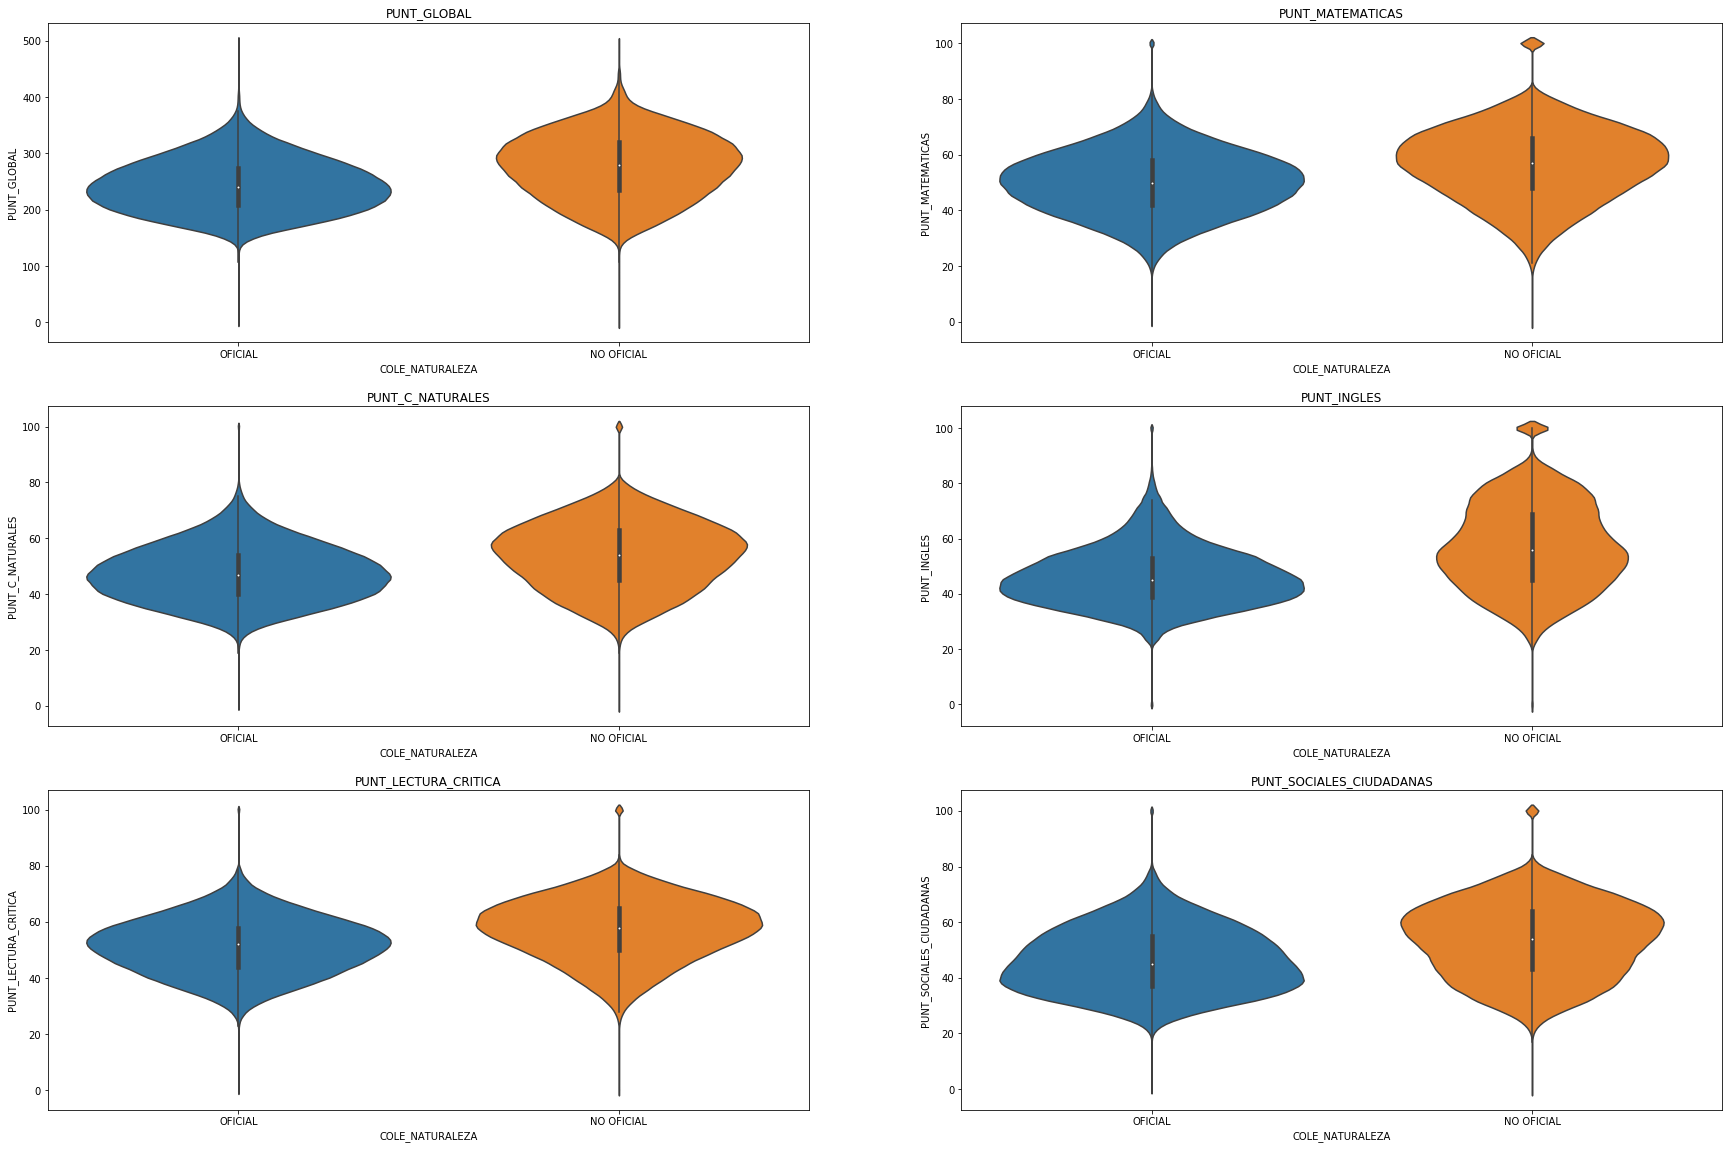

PUNT_GLOBAL                                                   \
                      count        mean        std  min    25%    50%    75%   
COLE_NATURALEZA                                                                
NO OFICIAL         221382.0  277.114034  56.893942  0.0  235.0  280.0  320.0   
OFICIAL            684653.0  243.063342  46.560955  0.0  208.0  240.0  275.0   

                       PUNT_MATEMATICAS                                   \
                   max            count       mean        std  min   25%   
COLE_NATURALEZA                                                            
NO OFICIAL       495.0         221382.0  56.593540  13.033345  0.0  48.0   
OFICIAL          500.0         684653.0  50.067244  11.231516  0.0  42.0   

                                   PUNT_C_NATURALES                        \
                  50%   75%    max            count       mean        std   
COLE_NATURALEZA                                                             
NO OFICIAL       57.0  66.0  100.0         221382.0  53.772082  11.935957   
OFICIAL          50.0  58.0  100.0         684653.0  47.483606   9.993765   

                                              PUNT_INGLES             \
                 min   25%   50%   75%    max       count       mean   
COLE_NATURALEZA                                                        
NO OFICIAL       0.0  45.0  54.0  63.0  100.0    221382.0  57.094777   
OFICIAL          0.0  40.0  47.0  54.0  100.0    684653.0  46.272729   

                                                         PUNT_LECTURA_CRITICA  \
                       std  min   25%   50%   75%    max                count   
COLE_NATURALEZA                                                                 
NO OFICIAL       15.537732  0.0  45.0  56.0  69.0  100.0             221382.0   
OFICIAL          10.463879  0.0  39.0  45.0  53.0  100.0             684653.0   

                                                                     \
                      mean        std  min   25%   50%   75%    max   
COLE_NATURALEZA                                                       
NO OFICIAL       57.323576  10.901280  0.0  50.0  58.0  65.0  100.0   
OFICIAL          51.443116   9.903912  0.0  44.0  52.0  58.0  100.0   

                PUNT_SOCIALES_CIUDADANAS                                  \
                                   count       mean       std  min   25%   
COLE_NATURALEZA                                                            
NO OFICIAL                      221382.0  53.444575  13.31318  0.0  43.0   
OFICIAL                         684653.0  46.236800  11.45414  0.0  37.0   

                                    
                  50%   75%    max  
COLE_NATURALEZA                     
NO OFICIAL       54.0  64.0  100.0  
OFICIAL          45.0  55.0  100.0

In [20]:
fig = plt.figure(figsize=(30, 20))
gs = GridSpec(nrows = 3, ncols = 2)

ax0 = fig.add_subplot(gs[0])
ax0 = sns.violinplot(x="COLE_NATURALEZA", y="PUNT_GLOBAL", data=df)
plt.setp(ax0, title = 'PUNT_GLOBAL')

ax1 = fig.add_subplot(gs[1])
ax1 = sns.violinplot(x="COLE_NATURALEZA", y="PUNT_MATEMATICAS", data=df)
plt.setp(ax1, title = 'PUNT_MATEMATICAS')

ax2 = fig.add_subplot(gs[2])
ax2 = sns.violinplot(x="COLE_NATURALEZA", y="PUNT_C_NATURALES", data=df)
plt.setp(ax2, title = 'PUNT_C_NATURALES')

ax3 = fig.add_subplot(gs[3])
ax3 = sns.violinplot(x="COLE_NATURALEZA", y="PUNT_INGLES", data=df)
plt.setp(ax3, title = 'PUNT_INGLES')

ax4 = fig.add_subplot(gs[4])
ax4 = sns.violinplot(x="COLE_NATURALEZA", y="PUNT_LECTURA_CRITICA", data=df)
plt.setp(ax4, title = 'PUNT_LECTURA_CRITICA')

ax5 = fig.add_subplot(gs[5])
ax5 = sns.violinplot(x="COLE_NATURALEZA", y='PUNT_SOCIALES_CIUDADANAS', data=df)
plt.setp(ax5, title = 'PUNT_SOCIALES_CIUDADANAS')

plt.show()

df[puntajes + ["COLE_NATURALEZA"]].groupby("COLE_NATURALEZA").describe()

La diferencia de puntajes mucho más acentuada por la naturaleza privada o pública del colegio.

* Las medias de los colegios privados superan a la de los públicos, tanto en el puntaje general como el de las pruebas específicas.

* Si se detalla la distribución de los mejores puntajes de las pruebas específicas de matemáticas, inglés, lectura crítica, ciencias naturales y competencias ciudadanas, se nota como la mayoría corresponde a puntajes de colegios privados.

    * La diferencia en rendimiento es especialmente pronunciada para la prueba de inglés, donde las medias están separadas por alrededor de 10 puntos, y el cuantil 75 para los estudiantes de colegios privados es 9 puntos más alto que los de los colegios públicos.
    
Como siguiente paso, se evaluarán las diferencias entre niveles socioeconómicos de los establecimientos:

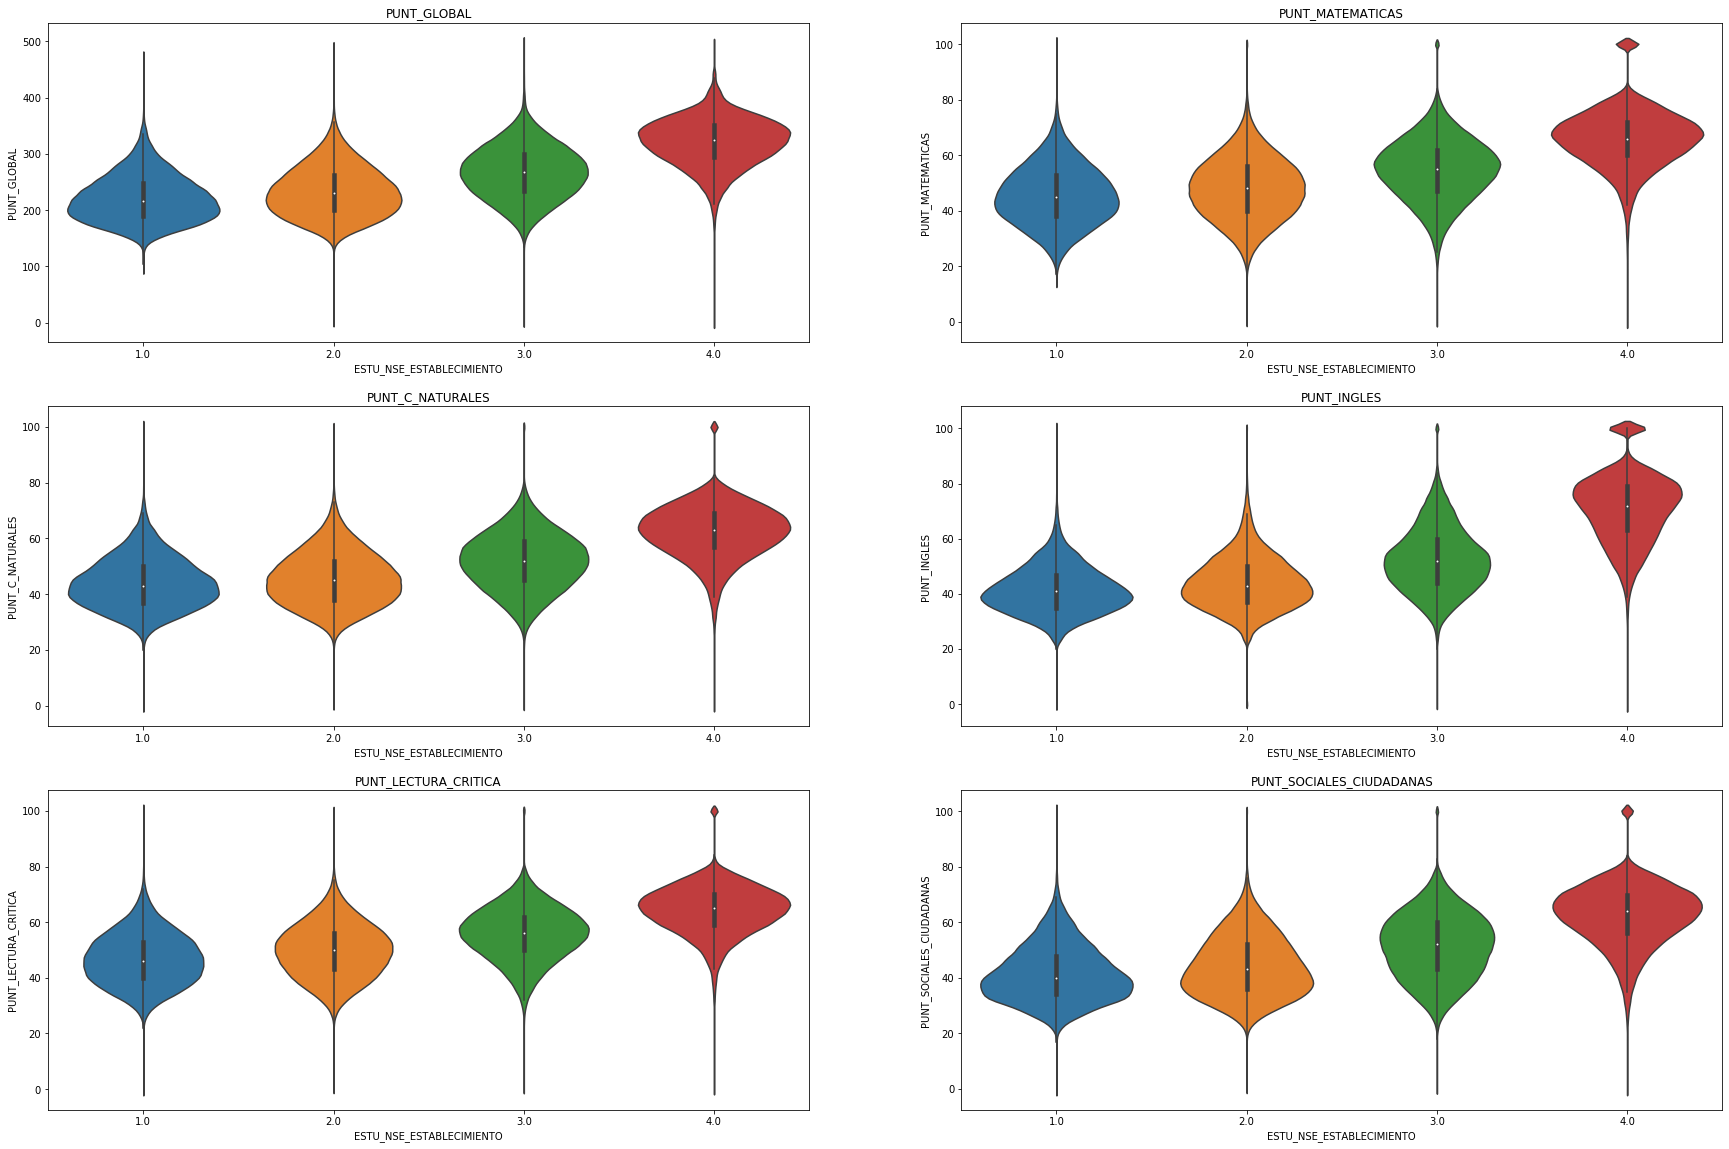

PUNT_GLOBAL                                      \
                               count        mean        std   min    25%   
ESTU_NSE_ESTABLECIMIENTO                                                   
1.0                          39029.0  221.241564  41.142294  97.0  190.0   
2.0                         468443.0  233.286554  44.121161   0.0  200.0   
3.0                         334612.0  266.836219  46.300557   0.0  234.0   
4.0                          63951.0  321.483855  42.683195   0.0  295.0   

                                              PUNT_MATEMATICAS             \
                            50%    75%    max            count       mean   
ESTU_NSE_ESTABLECIMIENTO                                                    
1.0                       217.0  248.0  472.0          39029.0  45.535576   
2.0                       230.0  263.0  492.0         468443.0  48.029197   
3.0                       267.0  300.0  500.0         334612.0  54.752439   
4.0                       325.0  351.0  495.0          63951.0  65.839596   

                                                                    \
                                std   min   25%   50%   75%    max   
ESTU_NSE_ESTABLECIMIENTO                                             
1.0                       10.476162  15.0  38.0  45.0  53.0  100.0   
2.0                       10.922651   0.0  40.0  48.0  56.0  100.0   
3.0                       10.987875   0.0  47.0  55.0  62.0  100.0   
4.0                       10.335367   0.0  60.0  66.0  72.0  100.0   

                         PUNT_C_NATURALES                                   \
                                    count       mean        std  min   25%   
ESTU_NSE_ESTABLECIMIENTO                                                     
1.0                               39029.0  44.019370   8.977018  0.0  37.0   
2.0                              468443.0  45.623179   9.575911  0.0  38.0   
3.0                              334612.0  51.819439  10.130488  0.0  45.0   
4.0                               63951.0  62.308127   9.522547  0.0  57.0   

                                            PUNT_INGLES                        \
                           50%   75%    max       count       mean        std   
ESTU_NSE_ESTABLECIMIENTO                                                        
1.0                       43.0  50.0  100.0     39029.0  41.425760   8.392710   
2.0                       45.0  52.0  100.0    468443.0  44.081519   9.543870   
3.0                       52.0  59.0  100.0    334612.0  52.355716  11.531838   
4.0                       63.0  69.0  100.0     63951.0  70.916530  12.527921   

                                                       PUNT_LECTURA_CRITICA  \
                          min   25%   50%   75%    max                count   
ESTU_NSE_ESTABLECIMIENTO                                                      
1.0                       0.0  35.0  41.0  47.0  100.0              39029.0   
2.0                       0.0  37.0  43.0  50.0  100.0             468443.0   
3.0                       0.0  44.0  52.0  60.0  100.0             334612.0   
4.0                       0.0  63.0  72.0  79.0  100.0              63951.0   

                                                                             \
                               mean       std  min   25%   50%   75%    max   
ESTU_NSE_ESTABLECIMIENTO                                                      
1.0                       46.824694  9.229334  0.0  40.0  46.0  53.0  100.0   
2.0                       49.674714  9.640822  0.0  43.0  50.0  56.0  100.0   
3.0                       55.873956  9.459879  0.0  50.0  56.0  62.0  100.0   
4.0                       64.388407  8.598334  0.0  59.0  65.0  70.0  100.0   

                         PUNT_SOCIALES_CIUDADANAS                             \
                                            count       mean        std  min   
ESTU_NSE_ESTABLECIMIENTO                                                      

In [21]:
fig = plt.figure(figsize=(30, 20))
gs = GridSpec(nrows = 3, ncols = 2)

ax0 = fig.add_subplot(gs[0])
ax0 = sns.violinplot(x="ESTU_NSE_ESTABLECIMIENTO", y="PUNT_GLOBAL", data=df)
plt.setp(ax0, title = 'PUNT_GLOBAL')

ax1 = fig.add_subplot(gs[1])
ax1 = sns.violinplot(x="ESTU_NSE_ESTABLECIMIENTO", y="PUNT_MATEMATICAS", data=df)
plt.setp(ax1, title = 'PUNT_MATEMATICAS')

ax2 = fig.add_subplot(gs[2])
ax2 = sns.violinplot(x="ESTU_NSE_ESTABLECIMIENTO", y="PUNT_C_NATURALES", data=df)
plt.setp(ax2, title = 'PUNT_C_NATURALES')

ax3 = fig.add_subplot(gs[3])
ax3 = sns.violinplot(x="ESTU_NSE_ESTABLECIMIENTO", y="PUNT_INGLES", data=df)
plt.setp(ax3, title = 'PUNT_INGLES')

ax4 = fig.add_subplot(gs[4])
ax4 = sns.violinplot(x="ESTU_NSE_ESTABLECIMIENTO", y="PUNT_LECTURA_CRITICA", data=df)
plt.setp(ax4, title = 'PUNT_LECTURA_CRITICA')

ax5 = fig.add_subplot(gs[5])
ax5 = sns.violinplot(x="ESTU_NSE_ESTABLECIMIENTO", y='PUNT_SOCIALES_CIUDADANAS', data=df)
plt.setp(ax5, title = 'PUNT_SOCIALES_CIUDADANAS')

plt.show()

df[puntajes + ["ESTU_NSE_ESTABLECIMIENTO"]].groupby("ESTU_NSE_ESTABLECIMIENTO").describe()

De lo anterior puede apreciarse que aparentemente existe una diferencia significativa entre el rendimiento de estudiantes de establecimientos de nivel socioeconómico.

* El mejor rendimiento promedio y la mayor participación en puntajes excepcionales es el de los establecimientos de NSE = 4. El siguiente mejor es el rendimiento de los establecimientos con NSE = 3. No se observan diferencias significativas en los rendimientos de los establecimientos de NSE 1 y 2.
    * Nótese que precisamente los estudiantes de establecimientos de NSE = 1 y 6, son los que menos participación (39029 y 663951, respectivamente) han tenido en las pruebas de Estado.
    * Algo que debe tenerse en cuenta en la política de asignación de becas es la posibilidad de premiar estudiantes cuyo rendimiento académico se explique en gran parte por el acceso a establecimientos de nivel socioeconómico mayor, lo cual reforzaría la desigualdad de ingresos y acceso a la educación.
    
Finalmente se revisarán las correlaciones entre las variables ordinales y numéricas:

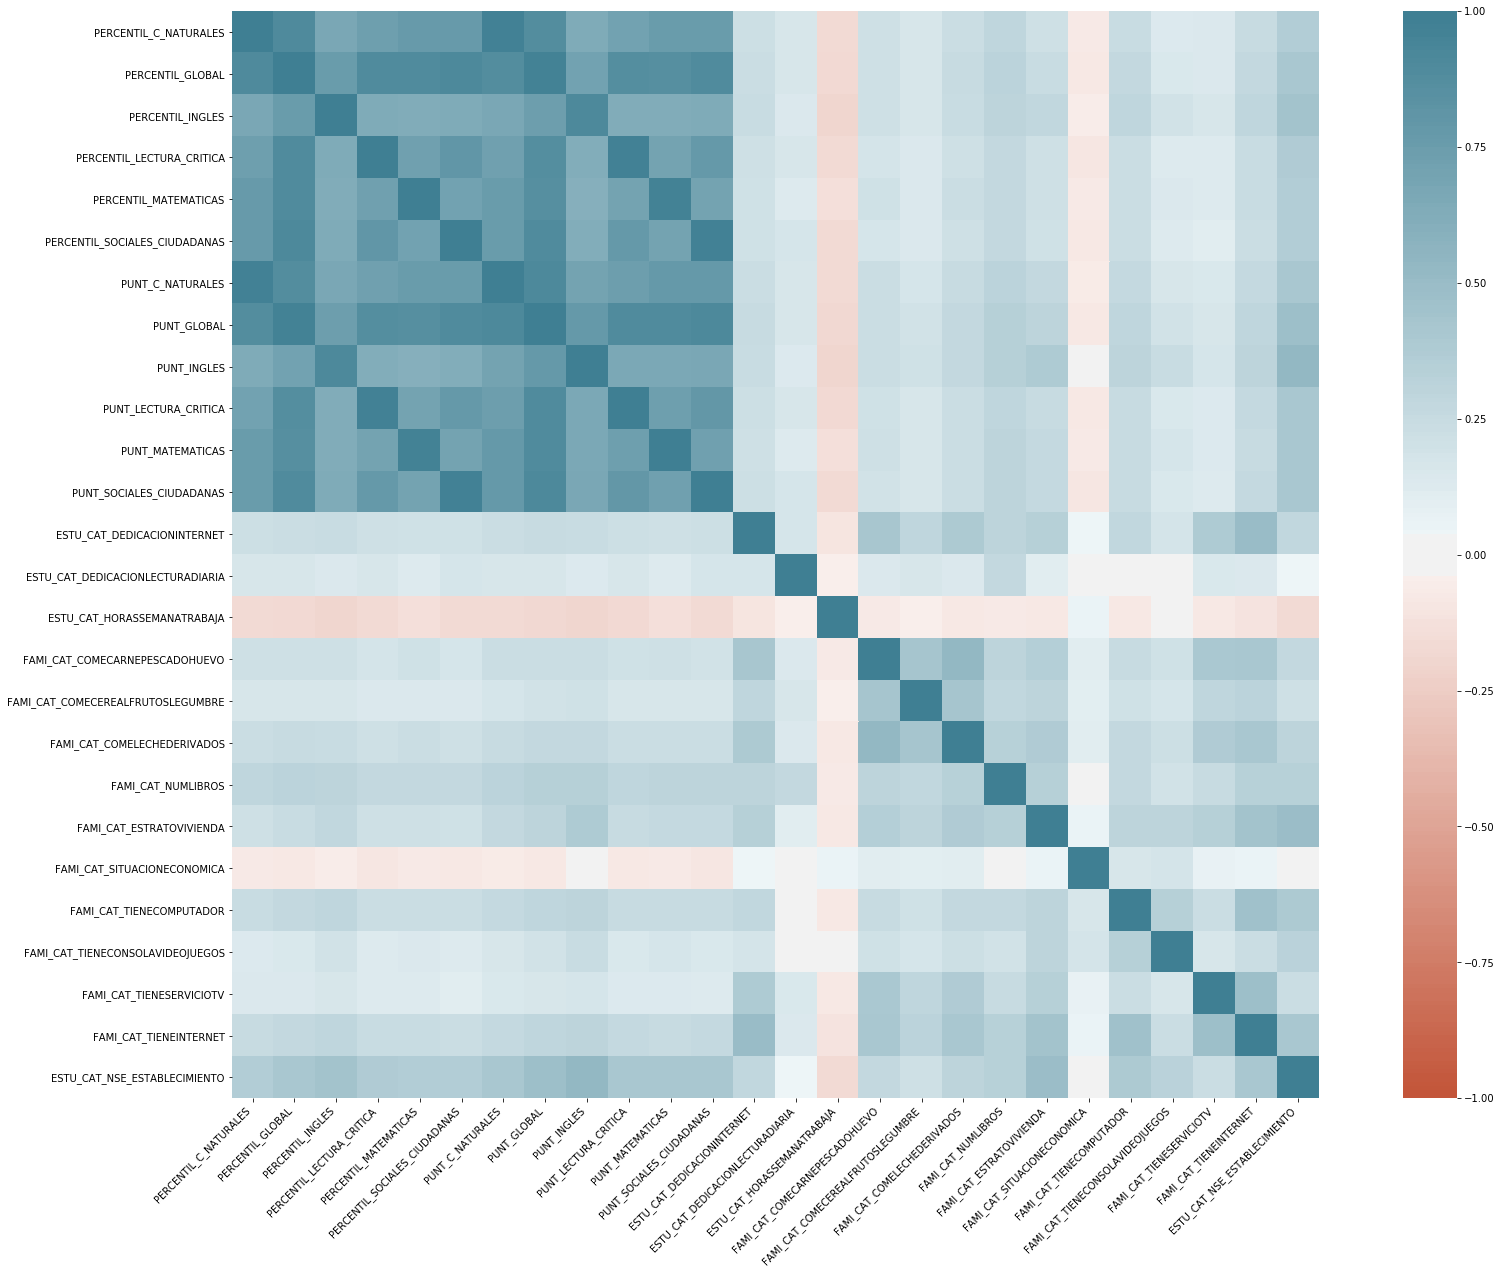

,PERCENTIL_C_NATURALES,PERCENTIL_GLOBAL,PERCENTIL_INGLES,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,ESTU_CAT_DEDICACIONINTERNET,ESTU_CAT_DEDICACIONLECTURADIARIA,ESTU_CAT_HORASSEMANATRABAJA,FAMI_CAT_COMECARNEPESCADOHUEVO,FAMI_CAT_COMECEREALFRUTOSLEGUMBRE,FAMI_CAT_COMELECHEDERIVADOS,FAMI_CAT_NUMLIBROS,FAMI_CAT_ESTRATOVIVIENDA,FAMI_CAT_SITUACIONECONOMICA,FAMI_CAT_TIENECOMPUTADOR,FAMI_CAT_TIENECONSOLAVIDEOJUEGOS,FAMI_CAT_TIENESERVICIOTV,FAMI_CAT_TIENEINTERNET,ESTU_CAT_NSE_ESTABLECIMIENTO
PERCENTIL_C_NATURALES,1.000000,0.901091,0.672881,0.730644,0.768797,0.766032,0.969812,0.877849,0.640850,0.718108,0.753930,0.752886,0.220984,0.157631,-0.162311,0.213071,0.158964,0.236608,0.290613,0.216751,-0.071335,0.242424,0.138795,0.142047,0.251551,0.364336
PERCENTIL_GLOBAL,0.901091,1.000000,0.755348,0.894205,0.888134,0.909342,0.879232,0.966647,0.715650,0.873425,0.865805,0.886589,0.240924,0.171059,-0.179500,0.215837,0.168084,0.252862,0.314240,0.242367,-0.085011,0.273482,0.155116,0.146591,0.279710,0.414738
PERCENTIL_INGLES,0.672881,0.755348,1.000000,0.644131,0.635661,0.646593,0.666781,0.745559,0.912154,0.635227,0.627811,0.640956,0.243437,0.142524,-0.190430,0.218531,0.170873,0.249753,0.311277,0.285361,-0.048160,0.291834,0.193998,0.165176,0.296096,0.441935
PERCENTIL_LECTURA_CRITICA,0.730644,0.894205,0.644131,1.000000,0.722446,0.798282,0.718787,0.869374,0.617429,0.971816,0.707770,0.780770,0.216386,0.165406,-0.171236,0.180801,0.145557,0.217450,0.274565,0.212713,-0.086611,0.240871,0.128967,0.126382,0.248399,0.371417
PERCENTIL_MATEMATICAS,0.768797,0.888134,0.635661,0.722446,1.000000,0.715436,0.756870,0.865664,0.609083,0.710211,0.968731,0.704247,0.207517,0.118741,-0.135145,0.199794,0.146174,0.229142,0.279240,0.213556,-0.072656,0.242051,0.148025,0.128992,0.243302,0.365921
PERCENTIL_SOCIALES_CIUDADANAS,0.766032,0.909342,0.646593,0.798282,0.715436,1.000000,0.752195,0.883119,0.620329,0.779136,0.700498,0.970700,0.204813,0.174404,-0.165483,0.173840,0.147676,0.215777,0.275468,0.209841,-0.081350,0.234443,0.125574,0.116514,0.238540,0.366389
PUNT_C_NATURALES,0.969812,0.879232,0.666781,0.718787,0.756870,0.752195,1.000000,0.909835,0.700009,0.740193,0.780468,0.776847,0.228203,0.156953,-0.168128,0.227371,0.176282,0.250716,0.314287,0.268074,-0.069157,0.258412,0.167841,0.151220,0.263868,0.417603
PUNT_GLOBAL,0.877849,0.966647,0.745559,0.869374,0.865664,0.883119,0.909835,1.000000,0.784179,0.894520,0.893637,0.911363,0.252211,0.170285,-0.183905,0.234867,0.188550,0.270315,0.343160,0.303443,-0.083743,0.291375,0.189258,0.158859,0.295364,0.476357
PUNT_INGLES,0.640850,0.715650,0.912154,0.617429,0.609083,0.620329,0.700009,0.784179,1.000000,0.662909,0.656569,0.669395,0.245192,0.137543,-0.197991,0.236453,0.199439,0.270376,0.351029,0.380019,-0.036197,0.308293,0.248336,0.173528,0.298740,0.532665
PUNT_LECTURA_CRITICA,0.718108,0.873425,0.635227,0.971816,0.710211,0.779136,0.740193,0.894520,0.662909,1.000000,0.727727,0.793708,0.225636,0.163269,-0.175407,0.195519,0.159915,0.230110,0.292709,0.255209,-0.085177,0.254506,0.152168,0.137218,0.260430,0.414124


In [22]:
df_corr = df[['PERCENTIL_C_NATURALES', 'PERCENTIL_GLOBAL', 'PERCENTIL_INGLES', 'PERCENTIL_LECTURA_CRITICA',
              'PERCENTIL_MATEMATICAS', 'PERCENTIL_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_GLOBAL',
              'PUNT_INGLES', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS',
              'ESTU_CAT_DEDICACIONINTERNET', 'ESTU_CAT_DEDICACIONLECTURADIARIA', 'ESTU_CAT_HORASSEMANATRABAJA',
              'FAMI_CAT_COMECARNEPESCADOHUEVO', 'FAMI_CAT_COMECEREALFRUTOSLEGUMBRE', 'FAMI_CAT_COMELECHEDERIVADOS',
              'FAMI_CAT_NUMLIBROS', 'FAMI_CAT_ESTRATOVIVIENDA', 'FAMI_CAT_SITUACIONECONOMICA', 'FAMI_CAT_TIENECOMPUTADOR',
              'FAMI_CAT_TIENECONSOLAVIDEOJUEGOS', 'FAMI_CAT_TIENESERVICIOTV', 'FAMI_CAT_TIENEINTERNET',
              'ESTU_CAT_NSE_ESTABLECIMIENTO']]

fig = plt.figure(figsize=(30, 20))

ax = sns.heatmap(
    df_corr.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.show()

df_corr.corr()

Se filtran aquellas correlaciones cuyo valor absoluto es mayor a 0.5 para determinar cuáles son las de mayor fortaleza. Se ignorarán las correlaciones entre las variables con prefijo `PERC` y `PUNT`.

In [23]:
df_corr.corr().abs()[df_corr.corr().abs() >= 0.5]

,PERCENTIL_C_NATURALES,PERCENTIL_GLOBAL,PERCENTIL_INGLES,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,ESTU_CAT_DEDICACIONINTERNET,ESTU_CAT_DEDICACIONLECTURADIARIA,ESTU_CAT_HORASSEMANATRABAJA,FAMI_CAT_COMECARNEPESCADOHUEVO,FAMI_CAT_COMECEREALFRUTOSLEGUMBRE,FAMI_CAT_COMELECHEDERIVADOS,FAMI_CAT_NUMLIBROS,FAMI_CAT_ESTRATOVIVIENDA,FAMI_CAT_SITUACIONECONOMICA,FAMI_CAT_TIENECOMPUTADOR,FAMI_CAT_TIENECONSOLAVIDEOJUEGOS,FAMI_CAT_TIENESERVICIOTV,FAMI_CAT_TIENEINTERNET,ESTU_CAT_NSE_ESTABLECIMIENTO
PERCENTIL_C_NATURALES,1.000000,0.901091,0.672881,0.730644,0.768797,0.766032,0.969812,0.877849,0.640850,0.718108,0.753930,0.752886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PERCENTIL_GLOBAL,0.901091,1.000000,0.755348,0.894205,0.888134,0.909342,0.879232,0.966647,0.715650,0.873425,0.865805,0.886589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PERCENTIL_INGLES,0.672881,0.755348,1.000000,0.644131,0.635661,0.646593,0.666781,0.745559,0.912154,0.635227,0.627811,0.640956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PERCENTIL_LECTURA_CRITICA,0.730644,0.894205,0.644131,1.000000,0.722446,0.798282,0.718787,0.869374,0.617429,0.971816,0.707770,0.780770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PERCENTIL_MATEMATICAS,0.768797,0.888134,0.635661,0.722446,1.000000,0.715436,0.756870,0.865664,0.609083,0.710211,0.968731,0.704247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PERCENTIL_SOCIALES_CIUDADANAS,0.766032,0.909342,0.646593,0.798282,0.715436,1.000000,0.752195,0.883119,0.620329,0.779136,0.700498,0.970700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PUNT_C_NATURALES,0.969812,0.879232,0.666781,0.718787,0.756870,0.752195,1.000000,0.909835,0.700009,0.740193,0.780468,0.776847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PUNT_GLOBAL,0.877849,0.966647,0.745559,0.869374,0.865664,0.883119,0.909835,1.000000,0.784179,0.894520,0.893637,0.911363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PUNT_INGLES,0.640850,0.715650,0.912154,0.617429,0.609083,0.620329,0.700009,0.784179,1.000000,0.662909,0.656569,0.669395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.532665
PUNT_LECTURA_CRITICA,0.718108,0.873425,0.635227,0.971816,0.710211,0.779136,0.740193,0.894520,0.662909,1.000000,0.727727,0.793708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se detectan las siguientes correlaciones:

* `ESTU_CAT_NSE_ESTABLECIMIENTO` y `PUNT_INGLES`: 0.532665
* `ESTU_CAT_DEDICACIONINTERNET` y `FAMI_CAT_TIENEINTERNET`: 0.504335
* `FAMI_CAT_COMELECHEDERIVADOS` y `FAMI_CAT_COMECARNEPESCADOHUEVO`: 0.532579

Sin embargo ninguna de ellas es cercana a 1 por lo que no se preveen problemas de multicolinealidad en las variables predictoras.

Se plantean 3 preguntas de negocio:

1. ¿La nutrición influye en el puntaje de las pruebas específicas?
1. ¿Puede determinarse si un estudiante estará por debajo o encima de un percentil del puntaje general?
1. ¿Los hábitos de uso del tiempo libre influyen en el puntaje de lectura crítica?

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

La segunda pregunda de negocio se abordará en esta sección y se replantea como la siguiente pregunta de analítica: _¿Puede usarse un subconjunto de variables de situación económica de la familia y establecimiento, nutrición y hábitos para crear un modelo de clasificación acerca si un estudiante estará por debajo o encima de un percentil del puntaje global?_

Esta pregunta intentará responderse mediante un modelo de máquina soportada en vectores (SVM), suponiendo que los puntos del conjunto de datos son linealmente separables.

In [110]:
alpha = 75 # Percentil de corte del puntaje general - El analista puede cambiar esto


# PERCENTIL GLOBAL es la variable dependiente, el resto son predictoras.
vars_interes = ['COLE_AREA_UBICACION', 'COLE_NATURALEZA', 'ESTU_DEDICACIONINTERNET', 'ESTU_DEDICACIONLECTURADIARIA',
                'ESTU_HORASSEMANATRABAJA', 'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
                'FAMI_COMELECHEDERIVADOS', 'FAMI_NUMLIBROS', 'FAMI_ESTRATOVIVIENDA', 'FAMI_SITUACIONECONOMICA',
                'FAMI_TIENECOMPUTADOR', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENEINTERNET',
                'COLE_BILINGUE', 'ESTU_NSE_ESTABLECIMIENTO', 'PERCENTIL_GLOBAL']

df_2 = df[vars_interes]

print("Forma antes del descarte de datos faltantes", df_2.shape)
df_2 = df_2.dropna() # Tal como se mencionó en el punto 1, se descartarán los datos faltantes
print("Forma después del descarte de datos faltantes", df_2.shape)

y = df_2["PERCENTIL_GLOBAL"]
df_2.drop(columns = ["PERCENTIL_GLOBAL"], inplace=True)

# Por limitaciones de mi computador personal para ajustar el modelo, escojo una muestra aleatoria del 8% del total de los datos.

df_2 = df_2.sample(frac=0.08, random_state=5)
y = y.loc[df_2.index].apply(lambda x: int(x >= alpha))

# Todas las variables predictoras son categóricas (incluso el estrato y el nivel socioeconómico pueden ser tratadas como tal)
# No hay necesidad de normalizar y se recurrirá entonces a su categorización mediante one-hot encoding.

df_2 = pd.get_dummies(df_2, columns=df_2.columns)

# Separación de los datos en conjunto de entrenamiento y prueba

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_2, y, test_size = 0.3, random_state = 0)

from sklearn.svm import SVC

# Entrenamiento del modelo y predicción
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Forma antes del descarte de datos faltantes (906035, 18)
Forma después del descarte de datos faltantes (822929, 18)


In [111]:
from sklearn import metrics

print("Matriz de confusión:\n", metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]))

TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()

accuracy = (TP + TN) / (TN + TP + FN + FP)
print("Exactitud: {:.4%}".format(accuracy))

sensitivity = TP / (TP + FN)
print("Sensitividad: {:.4%}".format(sensitivity))

specificity = TN / (TN + FP)
print("Especificidad: {:.4%}".format(specificity))

f1_score = TP / (TP + 0.5 * (FP + FN))
print("F1 Score: {:.4}".format(f1_score))

print("AUC score: {:.4%}".format(metrics.roc_auc_score(y_test, y_pred, labels=[0, 1])))

Matriz de confusión:
 [[13855   449]
 [ 4421  1026]]
Exactitud: 75.3430%
Sensitividad: 18.8361%
Especificidad: 96.8610%
F1 Score: 0.2964
AUC score: 57.8485%


* El modelo clasifica correctamente al 75.34% de los alumnos.
* El modelo clasifica correctamente al 18.84% de los alumnos igual o por encima del percentil 75 del puntaje global.
* El modelo clasifica correctamente al 96.86% de los alumnos por debajo del percentil 75 del puntaje global.

Entonces, si el objetivo primordial del modelo es detectar aquellos estudiantes por debajo del percentil 75, el modelo se comporta adecuadamente, pero se desempeña pobremente si el objetivo es buscar una clasificación balanceada.

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

In [ ]:
¿Los hábitos de uso del tiempo libre influyen en el puntaje de lectura crítica?